# This note book check heave variables and try to understand how it is computed for Reson files

The idea is to check if the heave is the heave vector refered to the reference point, or the same vector having the rotation matrix(pitch, roll) applied, or if it is really the translation vector of the sounder with respect to its original position.

The underlying question is : if heave is zero as input, do we have a heave_sounder !=0 as output and depending on the pitch variable


## imports some library

In [100]:
import netCDF4  as nc
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.dates as mdates


## set the files paths

In [101]:
base_path="D://DATA//file//XSF//XSFValidation//"
#base_path="D://DATA//file//XSF//OpenBST//"
#base_path="Z://database//Globe_Unit_Test_Dir//file//xsf//XSFValidation//"
filename=base_path+"out.s7k.xsf"


Static variables copied from 7030 datagram

In [102]:
water_line=0.85
Transmit_X_offset=35.450001
Transmit_Y_offset=0.040000
Transmit_Z_offset=6.840000
Transmit_roll=-0.000175
Transmit_pitch=0.035430
Transmit_heading=0.000000


Lecture de variables d'interêt

In [103]:
with nc.Dataset(filename) as dataset:
    #get beamGroup dataset
    beamGroup = dataset['/root/sonar/beam/Beam_group1/']
    vendor_group = dataset['/root/sonar/beam/Beam_group1/Vendor_specific']
    att = dataset['/root/platform/attitude/7003']
    platform_vertical_offset_xsf = np.array(beamGroup.variables["platform_vertical_offset"])
    tx_transducer_zdepth = np.array(beamGroup.variables["tx_transducer_zdepth"])
    platform_roll = np.array(beamGroup.variables["platform_roll"])
    platform_pitch = np.array(beamGroup.variables["platform_pitch"])
    time = np.array(beamGroup.variables["swath_time"])
    time=time.astype('datetime64[ns]')
    sounder_heave = np.array(vendor_group.variables["sounder_heave"])
    reference_heave=platform_vertical_offset_xsf-water_line
    
    HF_referenceHeave=np.array(att.variables["vertical_offset"])
    HF_referencePitch=np.array(att.variables["pitch"])
    HF_time = np.array(att.variables["time"])
    HF_time = HF_time.astype('datetime64[ns]')


On affiche les informations d'attitude et leurs différences respectives

In [104]:
#on agrandit les figures pour Jupyter
plt.rcParams['figure.dpi'] = 170

#On vérifie que les informations d'attitude sont globalement egaux
fig,axs= plt.subplots(2,1)
axs[0].plot(time,sounder_heave,label="sounder_heave",marker='+')
axs[0].plot(time,reference_heave, label="heave at ref point (platform_vertical_offset-sea level)",marker='+')
axs[0].set_ylabel("heaves")
#axs[0].set_ylim([-0.15,0.15])
axs[0].legend()
axs[0].grid()
fmt = mdates.DateFormatter('%H:%M:%S.%f')
axs[0].xaxis.set_major_formatter(fmt)
plt.gcf().autofmt_xdate()
axs[1].plot(time,np.abs(platform_vertical_offset_xsf-water_line-sounder_heave),label="diff heaves",marker='+',color="black")
axs[1].set_ylabel("diff")
axs[0].xaxis.set_major_formatter(fmt)
axs[0].xaxis.set_minor_formatter(fmt)
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()


## Conclusion partielle 
* Lorsque l'on regarde les valeurs pour lesquelles heave(reference) ~0, Le heave au transducteur n'est pas nul. Il semble prendre en compte les bras de levier
* Du coup le heave correspondrait à l'offset vertical du transducteur par rapport à son point de repos.

Pour vérifier l'impact du pitch, on trace la variable pitch ainsi que la différence entre les deux pilonnements et l'on corrèle ces informations pour vérifier que la différence est nulle lorsque le pitch est nul


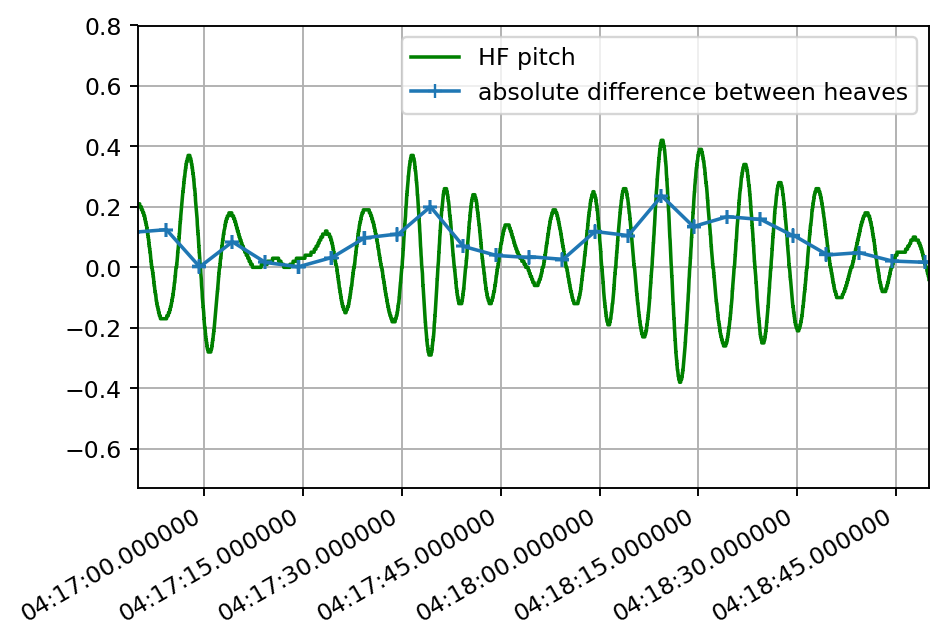

In [105]:
# On vérifie que les informations d'attitude sont globalement egaux
fig, axs = plt.subplots(1, 1,sharex=True)
axs.plot(HF_time, HF_referencePitch, label="HF pitch", color="green")
axs.plot(time,np.abs(reference_heave-sounder_heave), label="absolute difference between heaves", marker='+')
fmt = mdates.DateFormatter('%H:%M:%S.%f')
axs.xaxis.set_major_formatter(fmt)
axs.xaxis.set_major_formatter(fmt)
axs.xaxis.set_minor_formatter(fmt)
axs.set_xlim([mdates.datestr2num('20150902 04:16:50'), mdates.datestr2num('20150902 04:18:50')])
plt.gcf().autofmt_xdate()
axs.grid(True)
axs.legend()
plt.show()

# Conclusion  
On peut supposer que le heave renseigné dans les datagrammes correspond bien à la translation vertical 